In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
dfpl = pd.read_csv("Bank_Personal_Loan_Modelling.csv")   
dfpl.head(6) 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0


## Exploratory Data Analysis

In [3]:
dfpl.shape

(5000, 14)

In [5]:
dfpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
dfpl.isnull().values.any()

False

In [7]:
dfpl.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Descriptive Analysis

#1.Quartile Q3-Q1 > Mean , There are potential outliers in Age attributes.
#2.Mean - Median = Have sigficant skewness in Mortgage attribute so there is a possibility of Long tails.

In [8]:
dfpl.groupby(["Personal Loan"]).count() 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


The dataset is a biased dataset, because the binary outcome ratio have significant differences.

In [10]:
dfpl.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
5,37,13,29,4,0.4,2,155,0,0,0,1,0
6,53,27,72,2,1.5,2,0,0,0,0,1,0
7,50,24,22,1,0.3,3,0,0,0,0,0,1
8,35,10,81,3,0.6,2,104,0,0,0,1,0
9,34,9,180,1,8.9,3,0,1,0,0,0,0


## 2. Study the data distribution in each attribute, share your findings

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227C82FC588>,
      dtype=object)

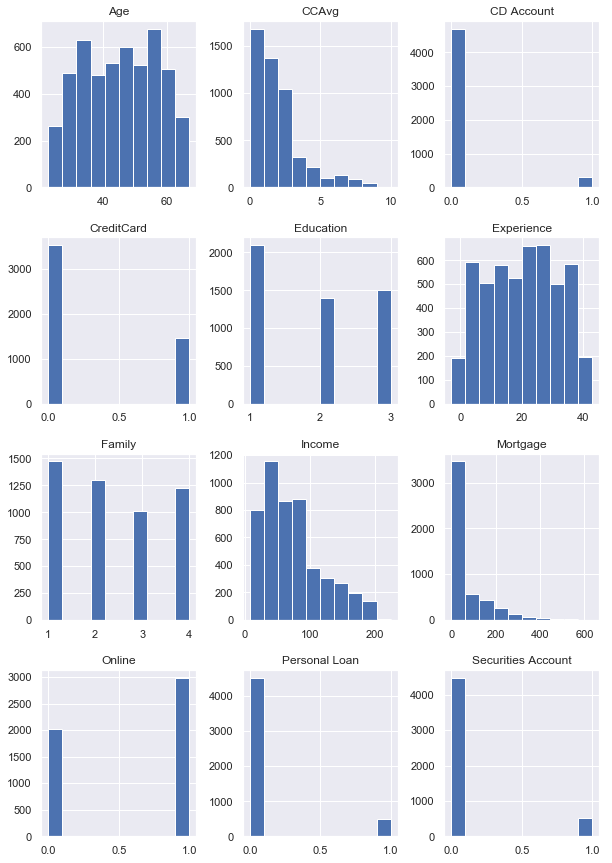

In [26]:
dfpl.hist(figsize=(10,15))

#Findings:
#1.Maximum bank customer from this dataset dont have bank products like , CD Account,Credit Card,Mortgage,Personal Loan & Securities
#2.Many Customers have online banking accesibility.
#3.High No of Experienced people between (20 to 25) Range.
#4.The bank has high no of low networth income customers.
#5.There are high no of customers are under grads.

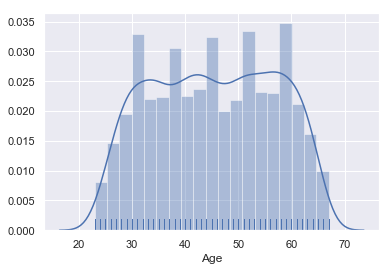

In [28]:
sns.distplot(dfpl['Age'], rug= True)

#The Age has multiple peaks , so it comprises of multiple gaussians.

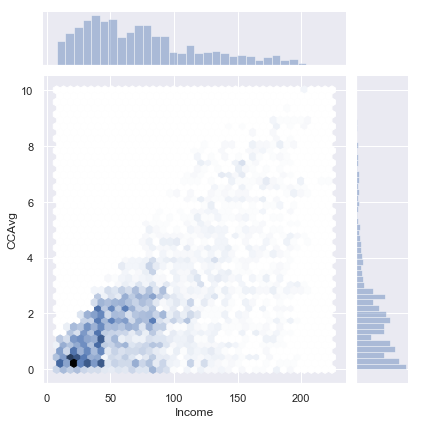

In [37]:
sns.jointplot(dfpl['Income'],dfpl['CCAvg'], kind='hex')

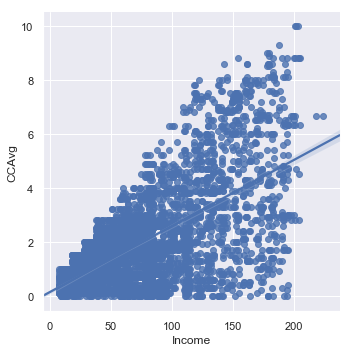

In [40]:
sns.lmplot(x= 'Income', y= 'CCAvg',data= dfpl)

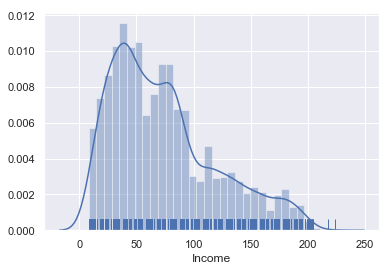

In [50]:
sns.distplot(dfpl['Income'], rug=True)

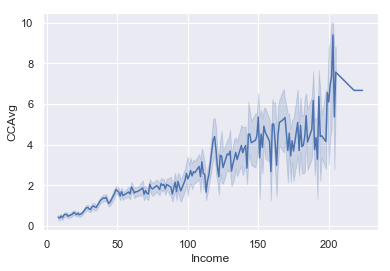

In [42]:
sns.lineplot(y = 'CCAvg',x ='Income', data=dfpl)

#Most of the customers are middle income customer have less credit card spendings.
#In this dataset Income attribute have multiple classes.
#There are few high income customer have high spending on credit cards.

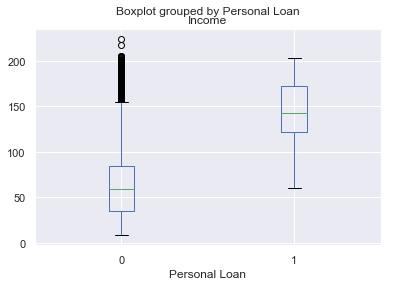

In [46]:
dfpl.boxplot(column="Income", by="Personal Loan")

#There are significant amount of high income customers have no personal loan product in bank.

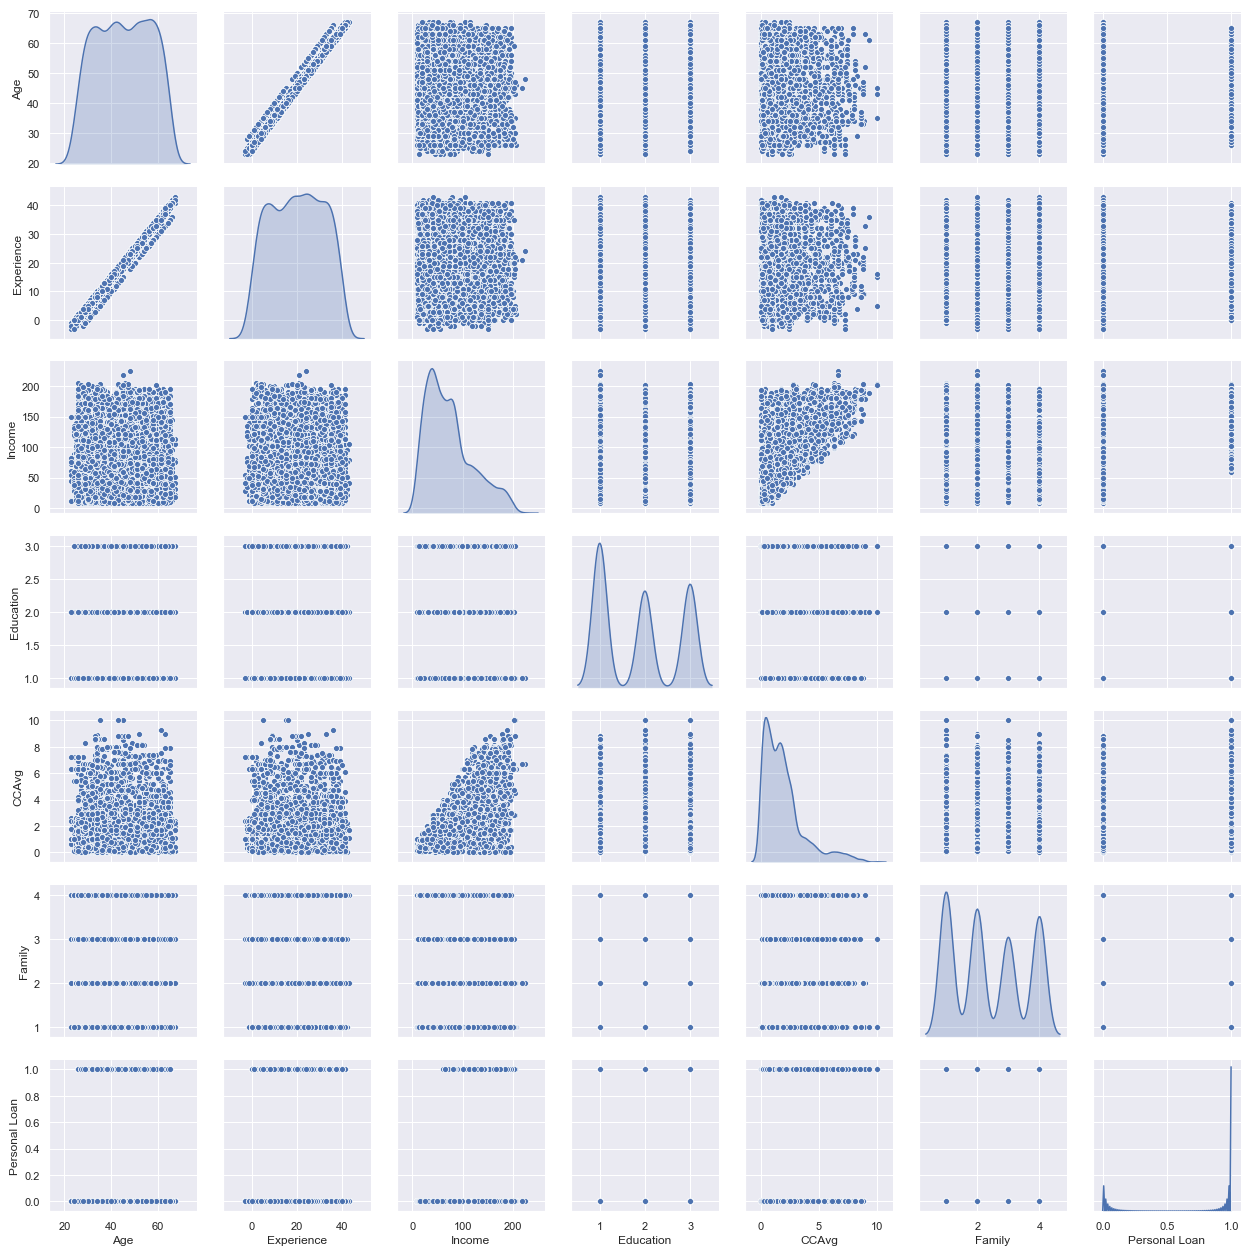

In [54]:
sns.pairplot(dfpl [['Age','Experience','Income','Education','CCAvg','Family','Personal Loan']], diag_kind='kde')

#Findings
#1. Expereince and age has postive linear relation ship.
#2. Following attributes have multiple gaussians Age, Expereince, Income, Education, CCAvg,Family.
#3. There is no relation between the following, the data is cloudy.
    #Age vs Income/CCavg
    #Expereince vs Income/CCavg
    #Income vs Expereince/Age/CCavg

## 3. Get the target column distribution. Your comments

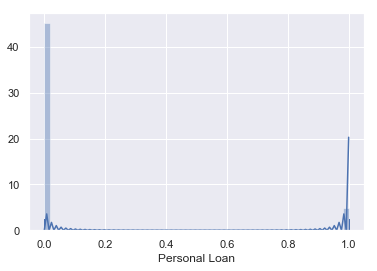

In [55]:
sns.distplot(dfpl['Personal Loan'], rug=True)

#The Target column having a biased data.

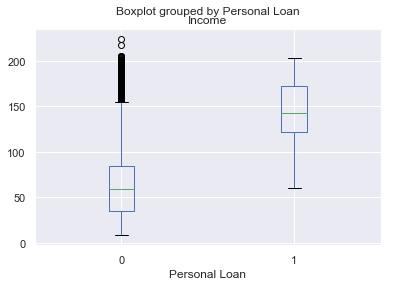

In [56]:
dfpl.boxplot(column="Income", by="Personal Loan")

#There are significant amount of high income customers have no personal loan product in bank.

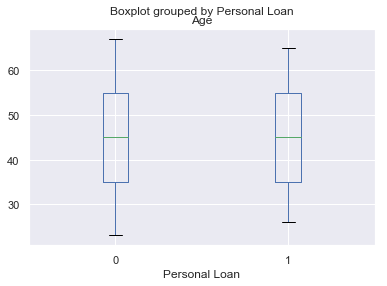

In [64]:
dfpl.boxplot(column="Age", by="Personal Loan")

#The Data range is same between the customer who has have personal loan and not have vs Age.
#The Range of age is between 35 to 55 in both cases.

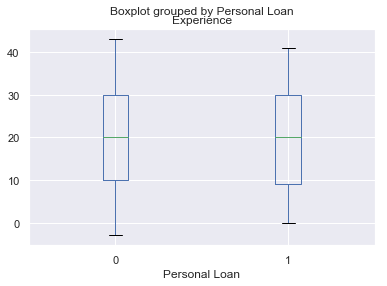

In [65]:
dfpl.boxplot(column="Experience", by="Personal Loan")

#The Data range is same between the customer who has have personal loan and not have vs Expereince.
#The Range of age is between 10 to 30 in both cases.

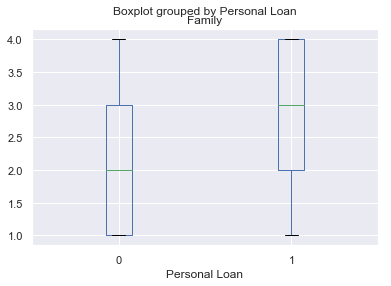

In [66]:
dfpl.boxplot(column="Family", by="Personal Loan")

#The Data shows the family size who have 2 and above  have opted for personal loan.

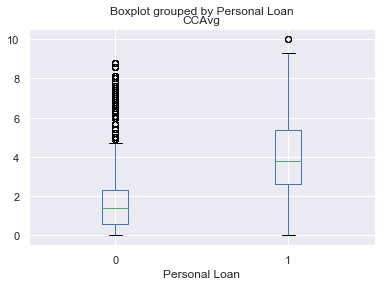

In [67]:
dfpl.boxplot(column="CCAvg", by="Personal Loan")

#There are potentially high no of no PL customers have higher spendings, seems there is a seperate gaussian on Avg Spending attribute

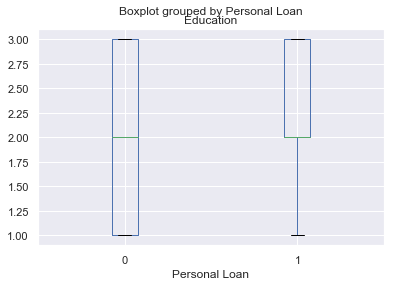

In [68]:
dfpl.boxplot(column="Education", by="Personal Loan")

#Most PL opted by grduated customers.
#There is a clear indication that undergrduate customers has never opted for PL.

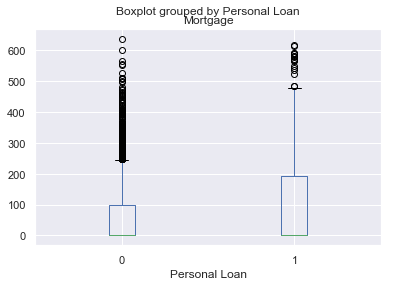

In [69]:
dfpl.boxplot(column="Mortgage", by="Personal Loan")

#High number of mortgage customers who have'nt opted for PL.
#Mortgage have many gaussians.

In [80]:
corr = dfpl.corr()
corr

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


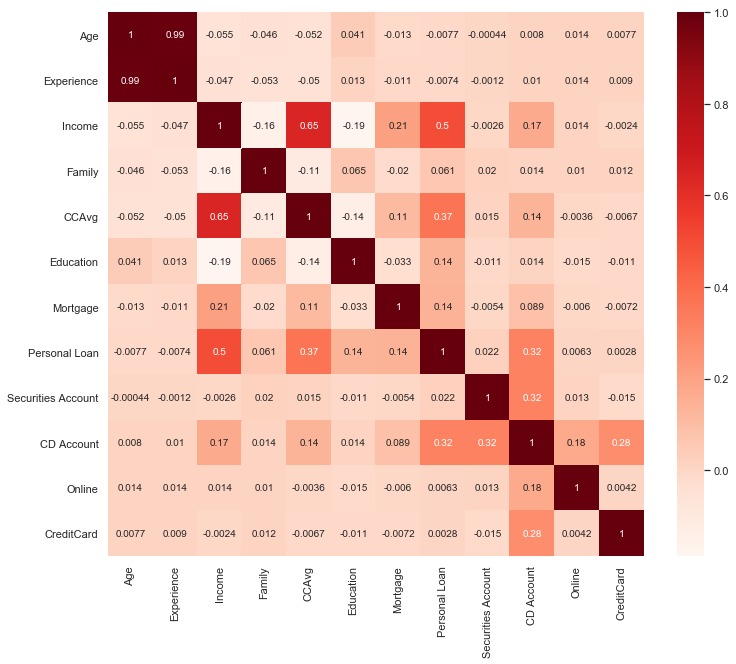

In [81]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

#Findings

#Income and Average credit card spending have high correlation.
#Age and Expereince have very high correlation.
#Income and personal have moderate correlation.
#Many attributes are negatively correlated.

## Explore categorical variables

In [12]:
dfpl['Family'].value_counts(normalize=True)

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64

In [13]:
dfpl['Education'].value_counts(normalize=True)

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

In [14]:
dfpl['Securities Account'].value_counts(normalize=True)

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

In [15]:
dfpl['CD Account'].value_counts(normalize=True)

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

In [16]:
dfpl['Online'].value_counts(normalize=True)

1    0.5968
0    0.4032
Name: Online, dtype: float64

In [17]:
dfpl['CreditCard'].value_counts(normalize=True)

0    0.706
1    0.294
Name: CreditCard, dtype: float64

## Preparing the data to train a model

In [4]:
# drop the ID,Zip Code column as it is useless for the model
dfpl = dfpl.drop('ID', axis=1)
dfpl = dfpl.drop('ZIP Code', axis=1)

In [5]:
dfpl['Family']=dfpl['Family'].astype('category')
dfpl['Securities Account']=dfpl['Securities Account'].astype('category')
dfpl['CD Account']=dfpl['CD Account'].astype('category')
dfpl['Online']=dfpl['Online'].astype('category')
dfpl['CreditCard']=dfpl['CreditCard'].astype('category')

In [6]:
# Replace the numbers in categorical variables with the actual Education names in the origin col
dfpl['Education'] = dfpl['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'})
dfpl['Securities Account'] = dfpl['Securities Account'].replace({0: 'No_SA', 1: 'Have_SA'})
dfpl['CD Account'] = dfpl['CD Account'].replace({0: 'No_CDA', 1: 'Have_CDA'})
dfpl['Online'] = dfpl['Online'].replace({0: 'No_Online', 1: 'Have_Online'})
dfpl['CreditCard'] = dfpl['CreditCard'].replace({0: 'No_CC', 1: 'Have_CC'})
dfpl

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.60,Undergrad,0,0,Have_SA,No_CDA,No_Online,No_CC
1,45,19,34,3,1.50,Undergrad,0,0,Have_SA,No_CDA,No_Online,No_CC
2,39,15,11,1,1.00,Undergrad,0,0,No_SA,No_CDA,No_Online,No_CC
3,35,9,100,1,2.70,Graduate,0,0,No_SA,No_CDA,No_Online,No_CC
4,35,8,45,4,1.00,Graduate,0,0,No_SA,No_CDA,No_Online,Have_CC
5,37,13,29,4,0.40,Graduate,155,0,No_SA,No_CDA,Have_Online,No_CC
6,53,27,72,2,1.50,Graduate,0,0,No_SA,No_CDA,Have_Online,No_CC
7,50,24,22,1,0.30,Advanced/Professional,0,0,No_SA,No_CDA,No_Online,Have_CC
8,35,10,81,3,0.60,Graduate,104,0,No_SA,No_CDA,Have_Online,No_CC
9,34,9,180,1,8.90,Advanced/Professional,0,1,No_SA,No_CDA,No_Online,No_CC


In [7]:
X = dfpl.drop('Personal Loan', axis=1)
Y = dfpl[['Personal Loan']]

In [8]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X)
X.columns
X

,Age,Experience,Income,CCAvg,Mortgage,Family_1,Family_2,Family_3,Family_4,Education_Advanced/Professional,Education_Graduate,Education_Undergrad,Securities Account_Have_SA,Securities Account_No_SA,CD Account_Have_CDA,CD Account_No_CDA,Online_Have_Online,Online_No_Online,CreditCard_Have_CC,CreditCard_No_CC
0,25,1,49,1.60,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1
1,45,19,34,1.50,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1
2,39,15,11,1.00,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1
3,35,9,100,2.70,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1
4,35,8,45,1.00,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0
5,37,13,29,0.40,155,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1
6,53,27,72,1.50,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1
7,50,24,22,0.30,0,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0
8,35,10,81,0.60,104,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1
9,34,9,180,8.90,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1


## 4. Split the data into training and test set in the ratio of 70:30 respectively

In [9]:
#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

## 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

## Training and making predictions using a classification model

## Logistic Regression

In [25]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)

D:\DataScience\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\DataScience\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
y_predict = model.predict(X_test)

## Model evaluation

In [32]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))


0.8985714285714286
0.8933333333333333


In [15]:
t = list(X_train.columns)

coef_df = pd.DataFrame(model.coef_, columns= t)
coef_df['intercept'] = model.intercept_
print(coef_df)

       Age  Experience    Income     CCAvg  Mortgage  Family_1  Family_2  \
0 -0.19386    0.196091  0.058289  0.224574  0.000875 -1.196841 -1.184502   

   Family_3  Family_4  Education_Advanced/Professional  ...  \
0  1.080896  0.308199                           1.0881  ...   

   Education_Undergrad  Securities Account_Have_SA  Securities Account_No_SA  \
0            -2.883229                   -0.914296                 -0.077952   

   CD Account_Have_CDA  CD Account_No_CDA  Online_Have_Online  \
0             1.146403          -2.138652           -0.758489   

   Online_No_Online  CreditCard_Have_CC  CreditCard_No_CC  intercept  
0         -0.233759           -0.929363         -0.062886  -0.992248  

[1 rows x 21 columns]


## 6. Print the confusion matrix for all the above models

In [55]:
# make predictions
expected = y_test
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.90      0.60      0.72       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.93      0.80      0.85      1500
weighted avg       0.95      0.95      0.95      1500

[[1341   10]
 [  59   90]]


## Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

In [33]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
print(model_NB)

GaussianNB(priors=None, var_smoothing=1e-09)


D:\DataScience\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Model evaluation

In [34]:
print(model_NB.score(X_train, y_train))
print(model_NB.score(X_test, y_test))

0.8985714285714286
0.8933333333333333


## 6. Print the confusion matrix for all the above models

In [60]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1351
           1       0.47      0.50      0.48       149

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.71      0.72      0.71      1500
weighted avg       0.90      0.89      0.90      1500

[[1265   86]
 [  74   75]]


D:\DataScience\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [37]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [38]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

D:\DataScience\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

## Model evaluation

In [39]:
print(NNH.score(X_train, y_train))
print(NNH.score(X_test, y_test))


1.0
0.902


## 6. Print the confusion matrix for all the above models

In [40]:
# make predictions
expected = y_test
predicted = NNH.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1351
           1       0.51      0.33      0.40       149

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.72      0.65      0.67      1500
weighted avg       0.89      0.90      0.89      1500

[[1304   47]
 [ 100   49]]


## SVM

In [16]:
from sklearn.svm import SVC

In [13]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

D:\DataScience\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
prediction = svc_model.predict(X_test)

## Model evaluation

In [27]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9617142857142857
0.9546666666666667


## 6. Print the confusion matrix for all the above models

In [28]:
# make predictions
expected = y_test
predicted = svc_model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1351
           1       0.95      0.58      0.72       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.95      0.79      0.85      1500
weighted avg       0.95      0.95      0.95      1500

[[1346    5]
 [  63   86]]


In [17]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

D:\DataScience\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\DataScience\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [72]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9711428571428572
0.904


## 6. Print the confusion matrix for all the above models

In [18]:
# make predictions
expected = y_test
predicted = svc_model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1351
           1       0.65      0.07      0.13       149

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.78      0.53      0.54      1500
weighted avg       0.88      0.90      0.87      1500

[[1345    6]
 [ 138   11]]


In [19]:
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)

D:\DataScience\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\DataScience\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Model Evaluation

In [20]:
prediction = svc_model.predict(X_test)

print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9054285714285715
0.9006666666666666


## 6. Print the confusion matrix for all the above models

In [21]:
# make predictions
expected = y_test
predicted = svc_model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.00      0.00      0.00       149

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500

[[1351    0]
 [ 149    0]]


D:\DataScience\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\DataScience\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\DataScience\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 7. Give your reasoning on which is the best model in this case and why it performs better?

In [ ]:
# Model SVM performs better in  both Train and Test with 0.9617,0.9546
# In SVM Linear Kernal performs better precision on class levels of (0,1) as 0.96 and 0.95.

# By Kernal SVM , the matematical space is increased in polynomial, so it results the 
# data dimnesion increased to higher dimension and linearly seperated. 
# Also since th Gamma value is generalized, it performs equally better on Train and test.